In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Data Exploration and Evaluation

__For this project, please use the following columns:
‘loan_amnt’, ‘funded_amnt’, ‘term’, ‘int_rate’, ‘grade’, ‘annual_inc’, ‘issue_d’, ‘dti’, ‘revol_bal’, ‘total_pymnt’, ‘loan_status’
Load the data, select the relevant columns, and perform any necessary cleaning and aggregations to explore and better understand the dataset. Describe any assumptions you made to handle null variables and outliers. Describe the distributions of the features. Include two data visualizations and two summary statistics to support these findings.__

In [2]:
df = pd.read_csv('loan.csv', low_memory=False)[['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'grade', 'annual_inc', 'issue_d', 'dti', 'revol_bal', 'total_pymnt', 'loan_status']]

In [3]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status
0,5000.0,5000.0,36 months,10.65,B,24000.0,Dec-2011,27.65,13648.0,5861.071414,Fully Paid
1,2500.0,2500.0,60 months,15.27,C,30000.0,Dec-2011,1.00,1687.0,1008.710000,Charged Off
2,2400.0,2400.0,36 months,15.96,C,12252.0,Dec-2011,8.72,2956.0,3003.653644,Fully Paid
3,10000.0,10000.0,36 months,13.49,C,49200.0,Dec-2011,20.00,5598.0,12226.302212,Fully Paid
4,3000.0,3000.0,60 months,12.69,B,80000.0,Dec-2011,17.94,27783.0,3242.170000,Current


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 11 columns):
loan_amnt      887379 non-null float64
funded_amnt    887379 non-null float64
term           887379 non-null object
int_rate       887379 non-null float64
grade          887379 non-null object
annual_inc     887375 non-null float64
issue_d        887379 non-null object
dti            887379 non-null float64
revol_bal      887379 non-null float64
total_pymnt    887379 non-null float64
loan_status    887379 non-null object
dtypes: float64(7), object(4)
memory usage: 74.5+ MB


In [5]:
# We keep track of the numerical and categorical columns, to be used later
numerical_cols = ['loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_bal', 'total_pymnt']
categorical_cols = ['term', 'grade', 'issue_d', 'loan_status']

The `annual_inc` column contains 4 missing values. This is a rather small amount and it probably makes sense to simply drop these rows, however, before we do that we want to ensure that the missing values look "normal" (as opposed to have a meaning such as values being too high or too low).

In [6]:
df.quantile(0.25)

loan_amnt       8000.00
funded_amnt     8000.00
int_rate           9.99
annual_inc     45000.00
dti               11.91
revol_bal       6443.00
total_pymnt     1914.59
Name: 0.25, dtype: float64

In [7]:
df.quantile(0.75)

loan_amnt      20000.000000
funded_amnt    20000.000000
int_rate          16.200000
annual_inc     90000.000000
dti               23.950000
revol_bal      20829.000000
total_pymnt    10616.814231
Name: 0.75, dtype: float64

In [8]:
df[df['annual_inc'].isnull()]

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status
42449,5000.0,5000.0,36 months,7.43,A,NaN,Aug-2007,1.0,0.0,5593.46,Does not meet the credit policy. Status:Fully ...
42450,7000.0,7000.0,36 months,7.75,A,NaN,Aug-2007,1.0,0.0,7867.53,Does not meet the credit policy. Status:Fully ...
42480,6700.0,6700.0,36 months,7.75,A,NaN,Jul-2007,1.0,0.0,7530.42,Does not meet the credit policy. Status:Fully ...
42533,6500.0,6500.0,36 months,8.38,A,NaN,Jun-2007,4.0,0.0,7373.83,Does not meet the credit policy. Status:Fully ...


By looking at the numbers it seems that the loan amounts are quite low for all four of these cases, also it looks like the `dti` column seems off as well, hence that data doesn't look to be significant and is dropped.

In [9]:
df = df[df['annual_inc'].isnull() == False]

In [10]:
df.describe()

,loan_amnt,funded_amnt,int_rate,annual_inc,dti,revol_bal,total_pymnt
count,887375.000000,887375.000000,887375.000000,8.873750e+05,887375.000000,8.873750e+05,887375.000000
mean,14755.302719,14741.915678,13.246764,7.502759e+04,18.157113,1.692086e+04,7558.828791
std,8435.455353,8429.897444,4.381862,6.469830e+04,17.190629,2.242681e+04,7871.260790
min,500.000000,500.000000,5.320000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,8000.000000,8000.000000,9.990000,4.500000e+04,11.910000,6.443500e+03,1914.590000
50%,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,1.187500e+04,4894.950000
75%,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,2.082900e+04,10616.844231
max,35000.000000,35000.000000,28.990000,9.500000e+06,9999.000000,2.904836e+06,57777.579870


Note that `dti` has a max of 9999, an average of 18.157 and std dev of 17.191, the maximum value looks like a data anomaly.

In [11]:
df[df['dti'] == 9999]

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status
484446,20000.0,20000.0,36 months,16.99,D,0.0,Dec-2015,9999.0,7161.0,694.08,Current
531886,3700.0,3700.0,36 months,12.59,C,0.0,Nov-2015,9999.0,10649.0,242.70,Current


It seems that the reason the `dti` is 9999 is because `annual_inc` is 0, since we have only two anomolous values, we throw them out.

In [12]:
df = df[df['dti'] != 9999]

In [13]:
for col in categorical_cols:
    print('\nLevel counts for column:', col)
    print(df[col].value_counts())


Level counts for column: term
 36 months    621119
 60 months    266254
Name: term, dtype: int64

Level counts for column: grade
B    254535
C    245859
A    148198
D    139541
E     70705
F     23046
G      5489
Name: grade, dtype: int64

Level counts for column: issue_d
Oct-2015    48631
Jul-2015    45962
Dec-2015    44341
Oct-2014    38782
Nov-2015    37529
Aug-2015    35886
Apr-2015    35427
Jan-2015    35107
May-2015    31913
Jul-2014    29306
Sep-2015    28641
Jun-2015    28485
Mar-2015    25400
Nov-2014    25054
Feb-2015    23770
May-2014    19099
Apr-2014    19071
Aug-2014    18814
Jun-2014    17179
Mar-2014    16513
Jan-2014    15628
Feb-2014    15269
Dec-2013    15020
Nov-2013    14676
Oct-2013    14114
Sep-2013    12987
Aug-2013    12674
Jul-2013    11910
Jun-2013    10899
Sep-2014    10606
            ...  
Dec-2009      658
Oct-2009      604
Sep-2009      507
Aug-2009      446
Jul-2009      411
Jun-2009      406
Mar-2008      402
May-2009      359
Apr-2009      333
Mar-20

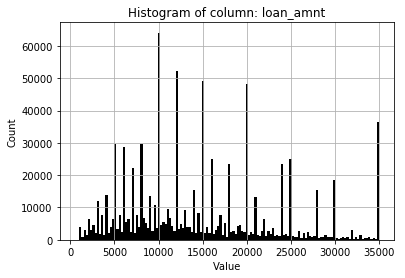

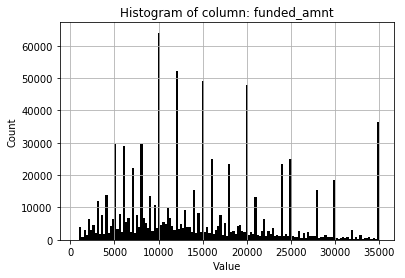

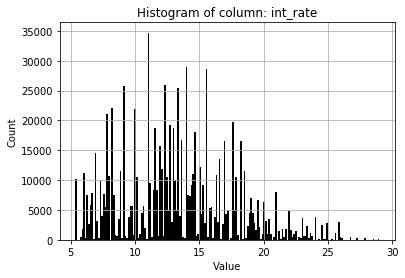

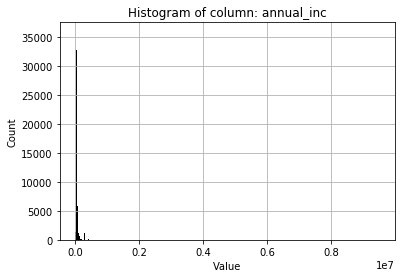

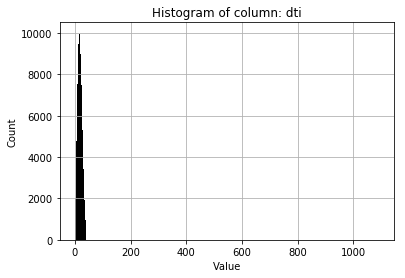

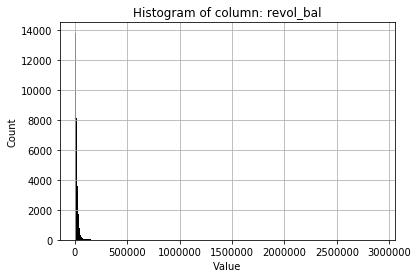

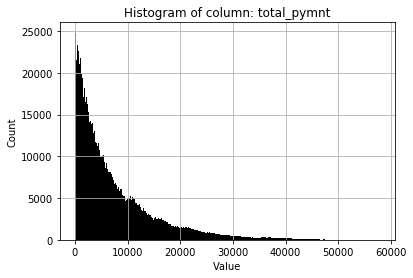

In [14]:
for col in numerical_cols:
    plt.hist(df[col], bins = 'auto', facecolor='black', alpha=1.0)
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.title('Histogram of column: ' + col)
    plt.grid(True)
    plt.show()

# Analysis

__1. What percentage of loans have been fully paid?__

In [15]:
# We use str.contains to include loans that did not meet the credit policy but were fully paid
(df['loan_status'].str.contains('Fully Paid')).sum() / len(df) * 100

23.632339500976478

_Around 23.6% of loans have been fully paid_

__2. When bucketed by year of origination and grade, which cohort has the highest rate of defaults? Here you may
assume that any loan which was not fully paid had “defaulted”.__

In [16]:
loan_count_df = df[['issue_d', 'grade', 'loan_status']] \
    .groupby(['issue_d', 'grade', 'loan_status']) \
    .size().reset_index().rename(columns = {0:'loan_count'})
total_loan_count_df = loan_count_df.groupby(['issue_d', 'grade'])['loan_count'].sum().reset_index() \
    .rename(columns = {'loan_count':'total_loan_count'})
loan_status_df = pd.merge(loan_count_df, total_loan_count_df)
loan_status_df = loan_status_df[df['loan_status'].str.contains('Fully Paid')] \
    .drop('loan_status', axis = 1)
loan_status_df['default_rate'] = 1 - (loan_status_df['loan_count'] / loan_status_df['total_loan_count'])
loan_status_df = loan_status_df.drop(['loan_count', 'total_loan_count'], axis = 1) \
    .sort_values(by = 'default_rate', ascending = False)
loan_status_df.head()

/Users/nabs/Envs/data_science/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,issue_d,grade,default_rate
525,Aug-2015,C,0.999901
2439,May-2015,A,0.999831
1908,Jun-2015,A,0.999803
2941,Oct-2013,B,0.999787
2176,Mar-2015,A,0.999764


_The cohort with the highest rate of default `1 - (# of fully paid loans / # of total loans)` is Aug 2015 grade C loans_

__3. When bucketed by year of origination and grade, what annualized rate of return have these loans generated on
average?__

In [17]:
df['aror'] = df.apply(lambda x: (x['total_pymnt'] / x['funded_amnt']) ** (1/3) - 1, axis = 1)
ror_df = df.groupby(['issue_d', 'grade'])['aror'].mean().reset_index() \
    .sort_values(by = 'aror', ascending = False)
ror_df[(ror_df['issue_d'] == 'Aug-2015') & (ror_df['grade'] == 'C')]

,issue_d,grade,aror
114,Aug-2015,C,-0.467379


_The cohort with the highest rate of defaults had an unsurprising low annualized rate of return of -46.73%_

# Modeling

__Please build a logistic regression model to predict loan defaults (as defined in question 2 above) that could help us avoid investing in such loans. Assume that (i) you are given the ability to invest in each loan independently; (ii) you invest immediately following loan origination and hold to maturity (36 months); and (iii) all loan fields that would be known upon origination are made available to you.
Was the model effective? Explain how you validated your model and describe how you measure the performance of the model.__

In [18]:
# Prep the dataset by including only 36 month loans and excluding some variables
X = df[df['term'] == ' 36 months']
y = X['loan_status'].str.contains('Fully Paid') == False
X = X.drop(['aror', 'loan_status', 'term', 'issue_d'], axis = 1)
X = pd.get_dummies(X, prefix = 'grade_')

In [19]:
# Set a hold-out test set aside
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('Train data size: ', len(X_train))
print('Test data size: ', len(X_test))
X_train.head()

Train data size:  465839
Test data size:  155280


,loan_amnt,funded_amnt,int_rate,annual_inc,dti,revol_bal,total_pymnt,grade__A,grade__B,grade__C,grade__D,grade__E,grade__F,grade__G
87681,12000.0,12000.0,15.10,65000.0,9.77,13100.0,9578.940000,0,0,1,0,0,0,0
175671,15000.0,15000.0,8.90,92000.0,18.14,11528.0,17074.699001,1,0,0,0,0,0,0
7857,10000.0,10000.0,5.42,55000.0,9.53,4738.0,10123.310000,1,0,0,0,0,0,0
78449,13000.0,13000.0,17.10,44900.0,24.48,5410.0,15723.140000,0,0,1,0,0,0,0
855610,16000.0,16000.0,14.31,65000.0,29.16,10353.0,6029.140000,0,0,1,0,0,0,0


In [20]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.96444487377640387

In [22]:
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

      False       0.90      0.98      0.94     41944
       True       0.99      0.96      0.98    113336

avg / total       0.97      0.96      0.96    155280



__Overall, the model looks to be quite effective with an F1 score of 0.96 on the hold out test set__